In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, average_precision_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier


In [87]:
# Laden des Diabetes Dataset
X, y = fetch_openml(data_id=37, as_frame=True, return_X_y=True)

In [88]:
# Klassenlabels in 0 und 1 umwandeln (Positiv = 1)
# TODO
y = y.map({
    "tested_positive": 1,
    "tested_negative": 0
})



In [65]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: category
Categories (2, int64): [0, 1]


<AxesSubplot:ylabel='Count'>

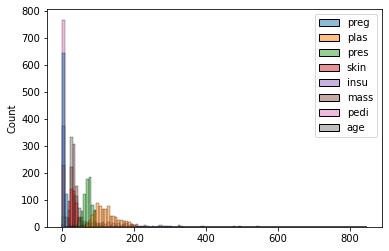

In [66]:
# Plot der Verteilung der Feature
# TODO
sns.histplot(X)

<AxesSubplot:xlabel='class', ylabel='Count'>

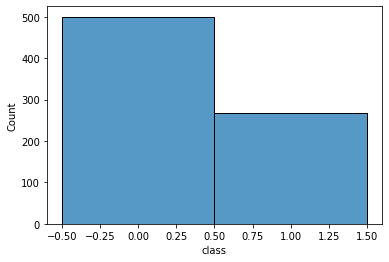

In [67]:
# Plot der Klassen-Verteilung
# TODO
sns.histplot(y)

In [89]:
# Daten skalieren
# TODO
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)




In [90]:
# Trainings-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [112]:
# Trainieren über verschiedene Nachbarschaften von 1-200
# Tracken der Metriken: F1, Accuarcy, AUPRC und AUROC
# TODO
classifiers = [KNeighborsClassifier(n_neighbors=n) for n in range(1, 201)]


sum = 0

scores = []

f1 = []
roc_auc = []
accuracy = []
average_precision = []

for classifier in classifiers:
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        f1.append(f1_score(y_test, y_pred))
        roc_auc.append(roc_auc_score(y_test, y_pred))
        accuracy.append(accuracy_score(y_test, y_pred))
        average_precision.append(average_precision_score(y_test, y_pred))







In [114]:
f1

[0.4587155963302752,
 0.345679012345679,
 0.5490196078431372,
 0.4470588235294118,
 0.5294117647058822,
 0.5,
 0.5242718446601942,
 0.5,
 0.5420560747663552,
 0.5050505050505051,
 0.5925925925925926,
 0.5742574257425742,
 0.5849056603773585,
 0.5742574257425742,
 0.5825242718446602,
 0.5894736842105263,
 0.6199999999999999,
 0.6170212765957446,
 0.6185567010309277,
 0.5934065934065934,
 0.6185567010309277,
 0.6105263157894736,
 0.6122448979591837,
 0.5714285714285714,
 0.5833333333333334,
 0.5806451612903225,
 0.6105263157894736,
 0.5934065934065934,
 0.6105263157894736,
 0.5842696629213483,
 0.6021505376344085,
 0.5617977528089887,
 0.5869565217391305,
 0.5934065934065934,
 0.6021505376344085,
 0.6,
 0.6153846153846153,
 0.5842696629213483,
 0.5934065934065934,
 0.5909090909090909,
 0.6,
 0.5842696629213483,
 0.6105263157894736,
 0.6,
 0.608695652173913,
 0.5934065934065934,
 0.608695652173913,
 0.6,
 0.6153846153846153,
 0.6,
 0.6153846153846153,
 0.5842696629213483,
 0.5934065934065

0.6199999999999999
0.7792207792207793
0.7151515151515152
0.5847926267281106


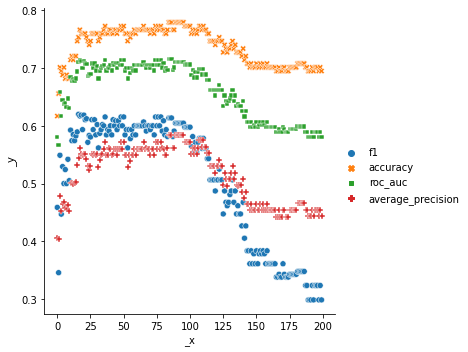

In [124]:
# Plotten der Metriken über die Nachbarschaftsgröße k
foo = pd.DataFrame({
    "f1": f1,
    "accuracy" : accuracy,
    "roc_auc" : roc_auc,
    "average_precision" : average_precision,

})
sns.relplot(data=foo)

print(max(f1))
print(max(accuracy))
print(max(roc_auc))
print(max(average_precision))

# Diskussion
Ab in etwa dem k-Wert 30 erreichen wir auf allen Metriken ein Plateau.
Unsere Maximalwerte für F1, Accuracy, AUROC, AUPRC liegen bei jeweils:
```
0.6199999999999999
0.7792207792207793
0.7151515151515152
0.5847926267281106
```
Für k-Werte größer 100 verzeichnen wir einen stetigen Abfall im Score.

Es ist also am sinnvollsten, nur Nachbarn der Anzahl zwischen 30 und 100 zu betrachten.
